In [209]:
#Import Libraries
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

In [217]:
#Image path

###Image path for non-symmetrical encoded images
#image_path ='Non-Symmetrical/11.png'
###Image path for symmetrical encoded images
image_path ='Symmetrical/11.png'

#Template path
template_path ='dot.png'

In [218]:
#Read image
img_rgb = cv.imread(image_path)

# img_gray = cv.cvtColor(img_rgb, cv.COLOR_BGR2GRAY)
#Get template
template = cv.imread(template_path,0)
template = cv.cvtColor(template,cv.COLOR_BGR2RGB)
w, h,_ = template.shape

In [219]:
row_half=int(img_rgb.shape[0]/2)
col_half=int(img_rgb.shape[1]/2)
#Divide images into 4 quadrants
img_1quad=img_rgb[:row_half,:col_half]
img_2quad=img_rgb[:row_half,col_half:]
img_3quad=img_rgb[row_half:,:col_half]
img_4quad=img_rgb[row_half:,col_half:]

In [220]:
'''
We detect presence of dots in each specific quadrant
And based on the presence/absence of dots in the quadrant
we keep a counter and based on the final value of the counter
we map it to a dictionary to output the binary values
'''
img_rgb=img_1quad
#Template matching on quadrant 1
res = cv.matchTemplate(img_rgb,template,cv.TM_CCOEFF_NORMED)
threshold = 0.6
loc = np.where( res >= threshold)
#To keep count of number of detections    
f_1=set()
    
for pt in zip(*loc[::-1]):
    #Draw rectangle for image interpretation
    cv.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (255,0,255), 2)
    #Tunable sensitivity
    sensitivity = 100
    f_1.add((round(pt[0]/sensitivity), round(pt[1]/sensitivity)))

img_rgb=img_2quad
#Template matching on quadrant 2
res = cv.matchTemplate(img_rgb,template,cv.TM_CCOEFF_NORMED)
threshold = 0.6
loc = np.where( res >= threshold)
#To keep count of number of detections    
f_2=set()
    
for pt in zip(*loc[::-1]):
    #Draw rectangle for image interpretation
    cv.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (255,0,255), 2)
    #Tunable sensitivity
    sensitivity = 100
    f_2.add((round(pt[0]/sensitivity), round(pt[1]/sensitivity)))

img_rgb=img_3quad
#Template matching on quadrant 3
res = cv.matchTemplate(img_rgb,template,cv.TM_CCOEFF_NORMED)
threshold = 0.6
loc = np.where( res >= threshold)
#To keep count of number of detections    
f_3=set()
    
for pt in zip(*loc[::-1]):
    #Draw rectangle for image interpretation
    cv.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (255,0,255), 2)
    #Tunable sensitivity
    sensitivity = 100
    f_3.add((round(pt[0]/sensitivity), round(pt[1]/sensitivity)))

img_rgb=img_4quad
#Template matching on quadrant 4
res = cv.matchTemplate(img_rgb,template,cv.TM_CCOEFF_NORMED)
threshold = 0.6
loc = np.where( res >= threshold)
#To keep count of number of detections    
f_4=set()
    
for pt in zip(*loc[::-1]):
    #Draw rectangle for image interpretation
    cv.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (255,0,255), 2)
    #Tunable sensitivity
    sensitivity = 100
    f_4.add((round(pt[0]/sensitivity), round(pt[1]/sensitivity)))

In [221]:
sum=0
if len(f_1)!=0:
    sum=1000+sum
if len(f_2)!=0:
    sum=100+sum
if len(f_3)!=0:
    sum=10+sum
if len(f_4)!=0:
    sum=1+sum
    
match_dict={
    0:'0000',
    1:'0001',
    10:'0010',
    11:'0011',
    100:'0100',
    101:'0101',
    110:'0110',
    111:'0111',
    1000:'1000',
    1001:'1001',
    1010:'1010',
    1011:'1011',
    1100:'1100',
    1101:'1101',
    1110:'1110',
    1111:'1111'
}

print('Binary decoding: ',match_dict[sum])

Binary decoding:  1011


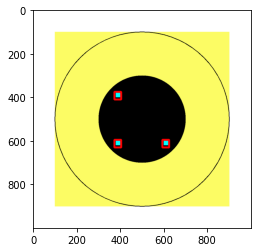

In [222]:
### Using Template matching we detect presence of dots
img_rgb = cv.imread(image_path)
res = cv.matchTemplate(img_rgb,template,cv.TM_CCOEFF_NORMED)
threshold = 0.6
loc = np.where( res >= threshold)
#To keep count of number of detections    
   
for pt in zip(*loc[::-1]):
    #Draw rectangle for image interpretation
    cv.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

img_rgb = cv.cvtColor(img_rgb, cv.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()